<a href="https://colab.research.google.com/github/Vicky-57/image-recognition-using-neural-networks/blob/main/image_recognition_using_neural_networks_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv # It is an open-source library that can be used to perform tasks like face detection, objection tracking, landmark detection, and much more
import numpy as np
import matplotlib.pyplot as plt#creating static, animated, and interactive visualizations in Python
import tensorflow as tf #helps you implement best practices for data automation, model tracking, performance monitoring, and model retraining.
import keras #implementing neural networks
from keras import layers
from keras import datasets
from keras import models

In [ ]:
(training_images, training_labels), (testing_images,testing_labels)= datasets.cifar10.load_data()#This is a dataset of 50,000 32x32 color training images and
                                                                                                #10,000 test images, labeled over 10 categories. See more info at the CIFAR homepage.

training_images, testing_images = training_images / 255,testing_images/ 255

class_names=['Plane', 'Car', 'Bird', 'Cat', 'Deer','Dog', 'Frog', 'Horse', 'ship', 'Truck']


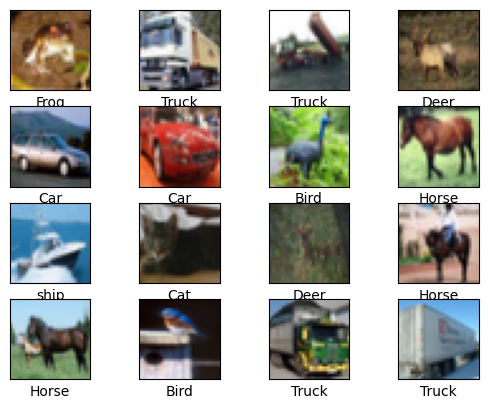

In [ ]:
for i in range(16):
    plt.subplot (4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])

plt.show()


In [ ]:
training_images = training_images[:20000]
training_labels = training_labels[:20000]
training_images = training_images[:4000]
training_labels = training_labels[:4000]


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation ='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation ='relu'))
model.add(layers.Dense(64,activation ='softmax'))


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))


Epoch 1/10
125/125 [==============================] - 15s 92ms/step - loss: 2.3824 - accuracy: 0.1587 - val_loss: 1.9822 - val_accuracy: 0.2414
Epoch 2/10
125/125 [==============================] - 11s 85ms/step - loss: 1.8323 - accuracy: 0.3350 - val_loss: 1.8680 - val_accuracy: 0.3367
Epoch 3/10
125/125 [==============================] - 10s 77ms/step - loss: 1.6937 - accuracy: 0.3817 - val_loss: 1.7752 - val_accuracy: 0.3543
Epoch 4/10
125/125 [==============================] - 12s 97ms/step - loss: 1.5981 - accuracy: 0.4135 - val_loss: 1.6953 - val_accuracy: 0.3693
Epoch 5/10
125/125 [==============================] - 12s 97ms/step - loss: 1.5159 - accuracy: 0.4568 - val_loss: 1.5972 - val_accuracy: 0.4224
Epoch 6/10
125/125 [==============================] - 12s 97ms/step - loss: 1.4352 - accuracy: 0.4825 - val_loss: 1.4854 - val_accuracy: 0.4614
Epoch 7/10
125/125 [==============================] - 11s 87ms/step - loss: 1.3617 - accuracy: 0.5105 - val_loss: 1.4800 - val_accuracy:

In [ ]:
loss,accuracy =model.evaluate(testing_images, testing_labels)
print(f"Loss:{loss}")
print(f"Accuracy{accuracy}")

model.save('image_classifier.model')

313/313 [==============================] - 6s 18ms/step - loss: 1.4231 - accuracy: 0.4937
Loss:1.423143744468689
Accuracy0.4936999976634979


In [ ]:
model = models.load_model('image_classifier.model')

In [ ]:
img = cv.imread('//content/car-gb1627fddb_640.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

1/1 [==============================] - 0s 39ms/step
Prediction is Car


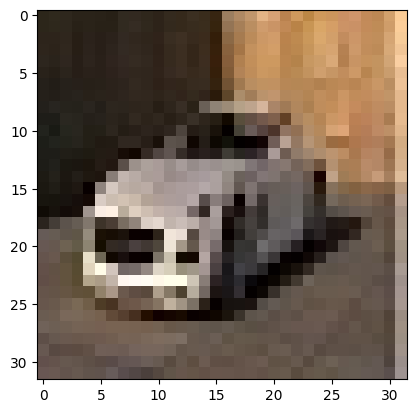

In [ ]:
plt.imshow(img, cmap=plt.cm.binary)#cmap stands for colormap and it's a colormap instance or registered colormap name

prediction = model.predict(np.array([img]) / 255)

index = np.argmax(prediction)

print(f'Prediction is {class_names[index]}')
plt.show()